<a href="https://colab.research.google.com/github/prenji37/CAPSTONE-PROJECT-C242-PS496/blob/main/Model_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
uploaded = files.upload()

### **DATA PREPARATION**

In [ ]:
df1 = pd.read_csv("/content/TRAIN_MENTAL_HEALTH_REAL.csv", sep = ',')
df1

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,Religious Activities Social Connections Online...
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,Religious Activities Sports and Fitness Online...
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Male,20,UNESA,Undergraduate,Psychology,3nd year,3.5-4.0,On Campus,No,4-6 times,...,5,3,3,3,2,5,4,5,3,Sleep
118,Female,19,UPNVJT,Undergraduate,Information Systems,2nd year,3.5-4.0,On Campus,No,1-3 times,...,4,5,5,4,3,5,3,4,5,Sleep
119,Male,22,UPNVJT,Undergraduate,Information Systems,4nd year,3.5-4.0,On Campus,No,4-6 times,...,3,5,4,4,5,5,2,5,5,Sports and Fitness
120,Female,21,UNESA,Undergraduate,Computer Sciences,4nd year,3.5-4.0,On Campus,No,1-3 times,...,4,4,4,3,3,4,3,5,4,Sleep


In [ ]:
df1.shape

(122, 21)

In [ ]:
df1.average_sleep.value_counts()

,count
average_sleep,
4-6 hrs,72
7-8 hrs,42
2-4 hrs,5
6-7 hrs,3


In [ ]:
df1.cgpa.value_counts()

,count
cgpa,
3.5-4.0,60
3.0-3.5,29
2.5-3.0,22
0.0-0.0,5
2.0-2.5,4
1.5-2.0,2


In [ ]:
df1.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,20.081967,4.016393,3.885246,3.819672,3.385246,3.065574,3.336066,3.213115,3.508197,3.385246
std,1.480396,1.052220,0.883239,1.120923,1.326443,1.264504,1.352137,1.293528,1.300006,1.369362
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.500000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,21.000000,5.000000,5.000000,5.000000,4.750000,4.000000,5.000000,4.000000,5.000000,5.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**INFO DATA**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    122 non-null    object
 1   age                       122 non-null    int64 
 2   university                122 non-null    object
 3   degree_level              122 non-null    object
 4   degree_major              122 non-null    object
 5   academic_year             122 non-null    object
 6   cgpa                      122 non-null    object
 7   residential_status        122 non-null    object
 8   campus_discrimination     122 non-null    object
 9   sports_engagement         122 non-null    object
 10  average_sleep             122 non-null    object
 11  study_satisfaction        122 non-null    int64 
 12  academic_workload         122 non-null    int64 
 13  academic_pressure         122 non-null    int64 
 14  financial_concerns        

### **IMPORTANT**

In [ ]:
df1.drop(['residential_status', 'sports_engagement', 'campus_discrimination'], axis=1, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    122 non-null    object
 1   age                       122 non-null    int64 
 2   university                122 non-null    object
 3   degree_level              122 non-null    object
 4   degree_major              122 non-null    object
 5   academic_year             122 non-null    object
 6   cgpa                      122 non-null    object
 7   average_sleep             122 non-null    object
 8   study_satisfaction        122 non-null    int64 
 9   academic_workload         122 non-null    int64 
 10  academic_pressure         122 non-null    int64 
 11  financial_concerns        122 non-null    int64 
 12  social_relationships      122 non-null    int64 
 13  depression                122 non-null    int64 
 14  anxiety                   

In [ ]:
df1.gender.value_counts()

,count
gender,
Male,86
Female,36


In [ ]:
df1.age.value_counts()

,count
age,
20,46
19,25
21,19
22,13
18,11
23,3
17,3
26,2


In [ ]:
df1.isnull().sum()

,0
gender,0
age,0
university,0
degree_level,0
degree_major,0
academic_year,0
cgpa,0
average_sleep,0
study_satisfaction,0
academic_workload,0


### Convert To Numeric

In [ ]:
categori_col = ['gender','university', 'degree_level','degree_major', 'academic_year', 'cgpa', 'average_sleep', 'stress_relief_activities']
numerikal_col = ['age','study_satisfaction','academic_pressure','financial_concerns','social_relationships', 'depression', 'anxiety', 'isolation','future_insecurity']

mental_cat = df1[categori_col]
mental_num = df1[numerikal_col]

### **Correlation**

In [ ]:
numeric_df = df1.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()

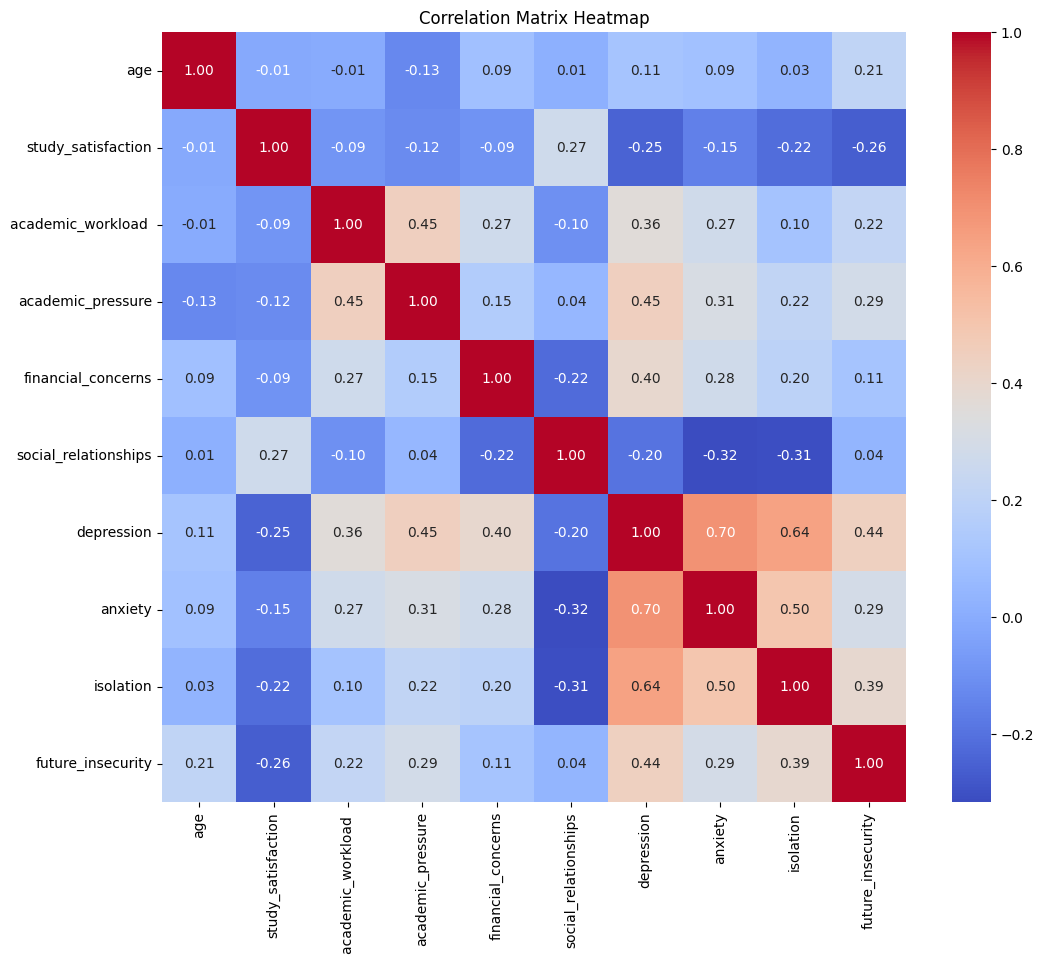

In [ ]:
correlation_matrix.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## **Visualization**


**DISRIBUTION BY AGE**

In [ ]:
# plt.figure(figsize=(6,4))
# sns.histplot(df1['age'],kde=True,color='green',edgecolor="black")
# plt.title("Distribution of Age")
# plt.xlabel("age")
# plt.show()

**DISTRIBUTIO OF UNIVERSITY**

In [ ]:
# value=df1.university.value_counts()
# labels=value.index
# plt.figure(figsize=(6,4))
# colors = ['#ff9999', '#ff66b3', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
# plt.pie(value,labels=labels,autopct='%0.0f%%',radius=1.5,colors=colors)
# plt.title("Distribution of Universities",pad=40)
# plt.legend(bbox_to_anchor =(1.3, 1))
# plt.show()

**DEPRESSION BY MAJOR**

In [ ]:
# degree_major_col = 'degree_major'
# depression_col = 'depression'

# mean_depression_by_major = df1.groupby(degree_major_col)[depression_col].mean()

# plt.figure(figsize=(8,6))
# mean_depression_by_major.plot(kind='bar', color='skyblue')

# plt.title('Average Depression by Degree Major')
# plt.xlabel('Degree Major')
# plt.ylabel('Average Depression Level')

# plt.show()

**ANXIETY BY MAJOR**

In [ ]:
# degree_major_col = 'degree_major'
# anxiety_col = 'anxiety'

# mean_depression_by_major = df1.groupby(degree_major_col)[anxiety_col].mean()

# plt.figure(figsize=(8,6))
# mean_depression_by_major.plot(kind='bar', color='skyblue')

# plt.title('Average Anxiety by Degree Major')
# plt.xlabel('Degree Major')
# plt.ylabel('Average Anxiety Level')

# plt.show()

### **Anxiety by Academic Year**

In [ ]:
# degree_major_col = 'academic_year'
# anxiety_col = 'anxiety'

# mean_depression_by_major = df1.groupby(degree_major_col)[anxiety_col].mean()

# plt.figure(figsize=(8,6))
# mean_depression_by_major.plot(kind='bar', color='skyblue')

# plt.title('Average Anxiety by Degree Major')
# plt.xlabel('Degree Major')
# plt.ylabel('Average Anxiety Level')

# plt.show()

In [ ]:
mental_cat.nunique()

,0
gender,2
university,17
degree_level,2
degree_major,12
academic_year,6
cgpa,6
average_sleep,4
stress_relief_activities,49


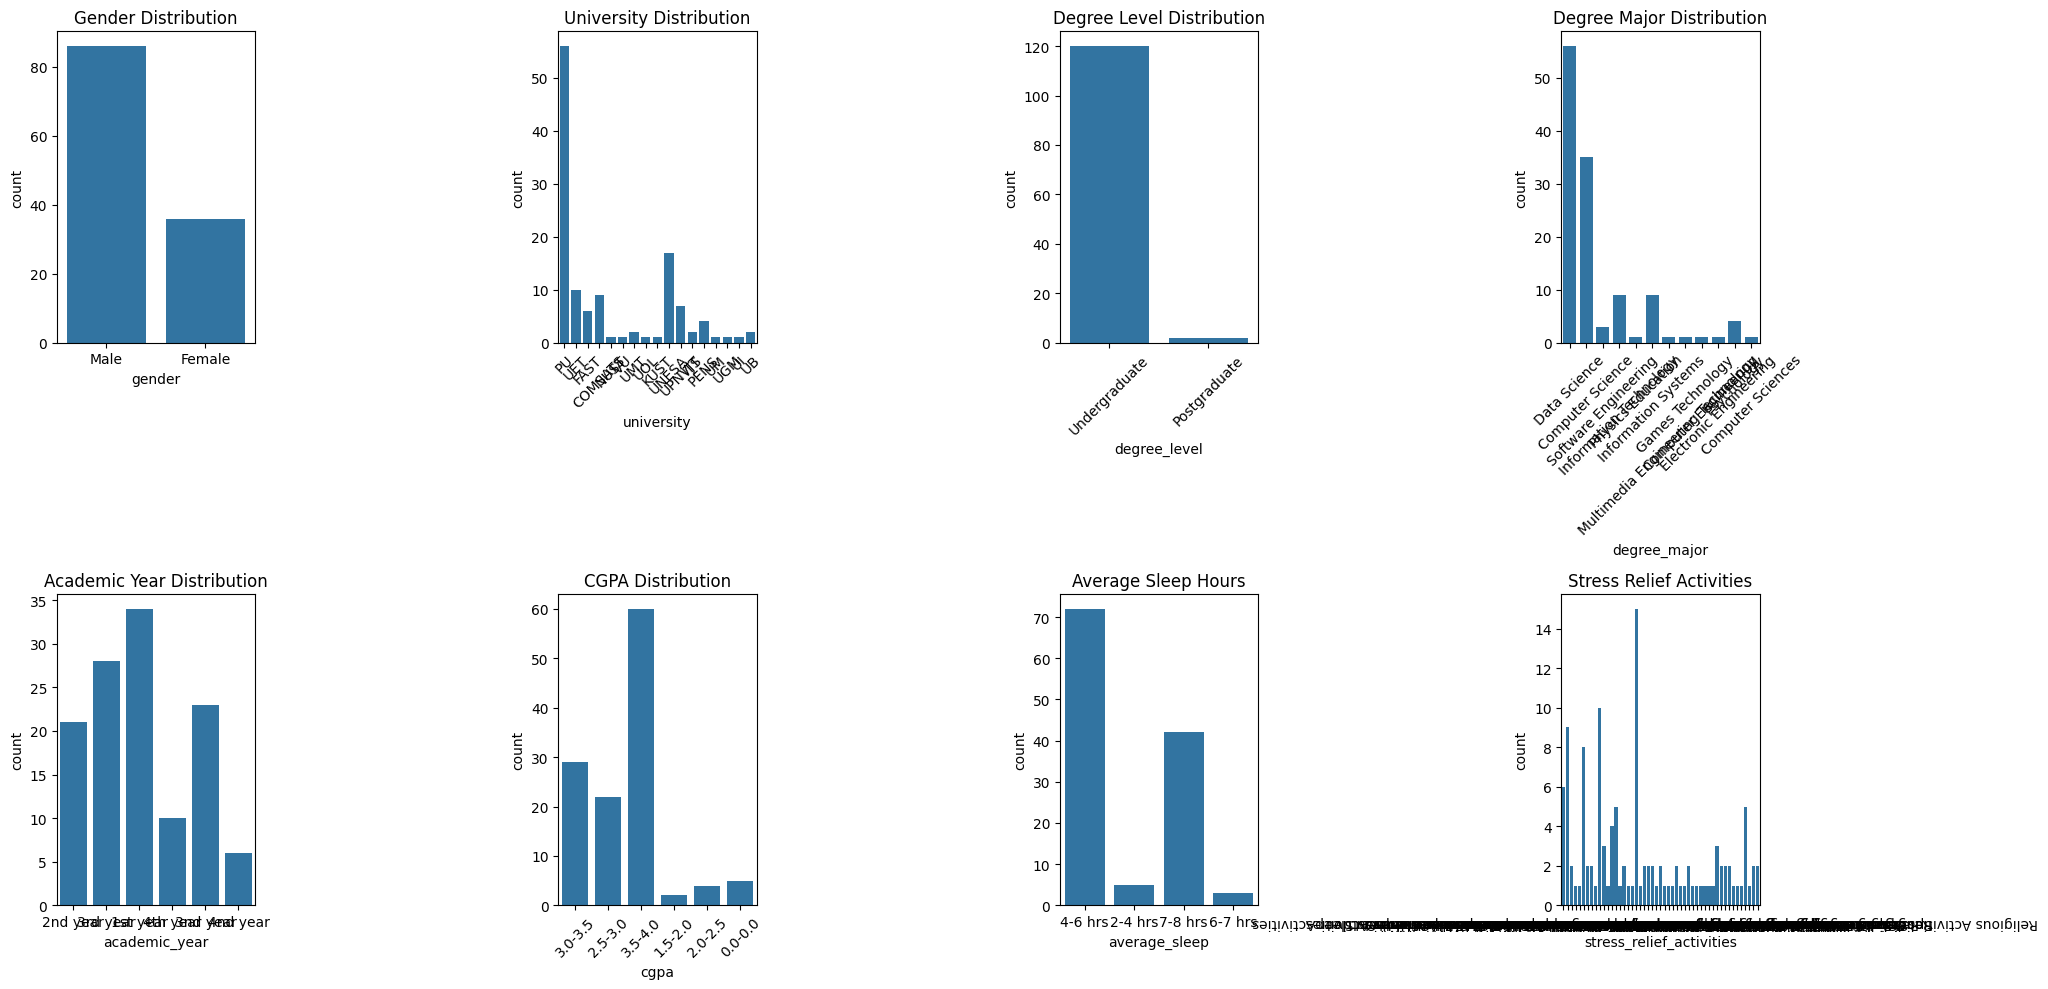

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Visualisasi untuk setiap kategori
sns.countplot(x='gender', data=mental_cat, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

sns.countplot(x='university', data=mental_cat, ax=axes[0, 1])
axes[0, 1].set_title('University Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='degree_level', data=mental_cat, ax=axes[0, 2])
axes[0, 2].set_title('Degree Level Distribution')
axes[0, 2].tick_params(axis='x', rotation=45)

sns.countplot(x='degree_major', data=mental_cat, ax=axes[0, 3])
axes[0, 3].set_title('Degree Major Distribution')
axes[0, 3].tick_params(axis='x', rotation=45)

sns.countplot(x='academic_year', data=mental_cat, ax=axes[1, 0])
axes[1, 0].set_title('Academic Year Distribution')

sns.countplot(x='cgpa', data=mental_cat, ax=axes[1, 1])
axes[1, 1].set_title('CGPA Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='average_sleep', data=mental_cat, ax=axes[1, 2])
axes[1, 2].set_title('Average Sleep Hours')

sns.countplot(x='stress_relief_activities', data=mental_cat, ax=axes[1, 3])
axes[1, 3].set_title('Stress Relief Activities')
axes[1, 3].tick_params(axis='x', rotation=180)

plt.tight_layout()
plt.show()

## **PREPROCESSING**

Build label Mental Health Status ('MHI')

In [ ]:
df1['MHI']= (df1['depression'] + df1['anxiety'] + df1['isolation']
             + df1['future_insecurity'])/4

Set limits to determine the status based on the MHI value

*   MHI < 2: Healthy
*   2 <= MHI < 4: Moderate
*   MHI >= 4: Critical

In [ ]:
def set_mental_health_status(MHI):
    if MHI < 2:
        return 'Mild Impact'
    elif 2 <= MHI < 4:
        return 'Moderate Impact'
    else:
        return 'Critical Impact'

In [ ]:
df1['Mental_Health_Status'] = df1['MHI'].apply(set_mental_health_status)

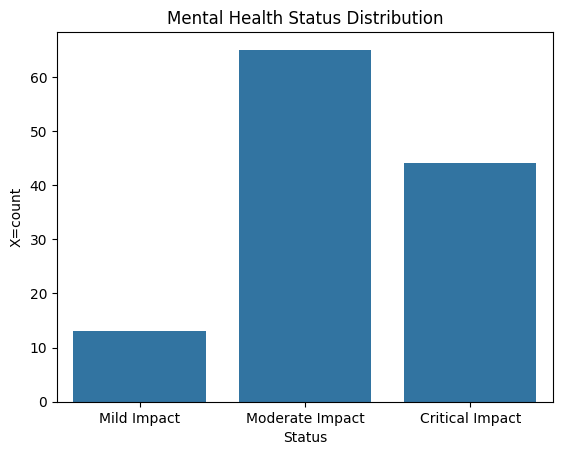

In [ ]:
sns.countplot(x = 'Mental_Health_Status', data = df1)
plt.title('Mental Health Status Distribution')
plt.xlabel('Status')
plt.ylabel('X=count')
plt.show()

Encoder Label

Encoder label with based on the value 0-2


*   Mild Impact = 0
*   Moderate Impact = 1
*   Critical Impact = 2



In [ ]:
mental_health_map = {'Mild Impact' : 0, 'Moderate Impact': 1, 'Critical Impact' : 2}
df1['Mental_Health_Status'] = df1['Mental_Health_Status'].map(mental_health_map)

In [ ]:
df1

,gender,age,university,degree_level,degree_major,academic_year,cgpa,average_sleep,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities,MHI,Mental_Health_Status
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,4-6 hrs,5,4,5,4,3,2,1,1,2,Religious Activities Social Connections Online...,1.50,0
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,4-6 hrs,5,4,4,1,3,3,3,3,4,Online Entertainment,3.25,1
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,2-4 hrs,5,5,5,3,4,2,3,3,1,Religious Activities Sports and Fitness Online...,2.25,1
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,4-6 hrs,3,5,4,4,1,5,5,5,3,Online Entertainment,4.50,2
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,4-6 hrs,3,5,5,2,3,5,5,4,4,Online Entertainment,4.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Male,20,UNESA,Undergraduate,Psychology,3nd year,3.5-4.0,4-6 hrs,5,3,3,3,2,5,4,5,3,Sleep,4.25,2
118,Female,19,UPNVJT,Undergraduate,Information Systems,2nd year,3.5-4.0,7-8 hrs,4,5,5,4,3,5,3,4,5,Sleep,4.25,2
119,Male,22,UPNVJT,Undergraduate,Information Systems,4nd year,3.5-4.0,4-6 hrs,3,5,4,4,5,5,2,5,5,Sports and Fitness,4.25,2
120,Female,21,UNESA,Undergraduate,Computer Sciences,4nd year,3.5-4.0,7-8 hrs,4,4,4,3,3,4,3,5,4,Sleep,4.00,2


Selection Feature

In [ ]:
important_selected = df1[['age', 'cgpa', 'average_sleep','study_satisfaction',
                   'academic_pressure', 'financial_concerns',
                   'social_relationships', 'depression', 'anxiety',
                   'isolation', 'future_insecurity','Mental_Health_Status']]

In [ ]:
df_selected = important_selected.copy()

Make function Convert 'cgpa' and 'average_sleep'

In [ ]:
def extract_mean_from_range(value):
    # check for NaN
    if pd.isna(value):
      return None

    numbers = [float(num) for num in value.replace(' hrs', '').split('-')]
    return sum(numbers) / len(numbers)

In [ ]:
df_selected['cgpa'] = df_selected['cgpa'].apply(extract_mean_from_range)
df_selected['average_sleep'] = df_selected['average_sleep'].apply(extract_mean_from_range)

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
features_to_normalize = ['cgpa', 'average_sleep', 'age', 'study_satisfaction',
                         'academic_pressure', 'financial_concerns', 'social_relationships',
                         'depression', 'anxiety', 'isolation', 'future_insecurity']

In [ ]:
# scaler = MinMaxScaler()
# df_selected[features_to_normalize] = scaler.fit_transform(df_selected[features_to_normalize])

In [ ]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_selected[features_to_normalize]),
                             columns=features_to_normalize)
df_normalized['Mental_Health_Status'] = df_selected['Mental_Health_Status'].values

In [ ]:
df_normalized

,cgpa,average_sleep,age,study_satisfaction,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,Mental_Health_Status
0,0.866667,0.444444,0.333333,1.00,1.00,0.75,0.50,0.25,0.00,0.00,0.25,0
1,0.866667,0.444444,0.333333,1.00,0.75,0.00,0.50,0.50,0.50,0.50,0.75,1
2,0.733333,0.000000,0.333333,1.00,1.00,0.50,0.75,0.25,0.50,0.50,0.00,1
3,0.733333,0.444444,0.333333,0.50,0.75,0.75,0.00,1.00,1.00,1.00,0.50,2
4,0.866667,0.444444,0.333333,0.50,1.00,0.25,0.50,1.00,1.00,0.75,0.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...
117,1.000000,0.444444,0.333333,1.00,0.50,0.50,0.25,1.00,0.75,1.00,0.50,2
118,1.000000,1.000000,0.222222,0.75,1.00,0.75,0.50,1.00,0.50,0.75,1.00,2
119,1.000000,0.444444,0.555556,0.50,0.75,0.75,1.00,1.00,0.25,1.00,1.00,2
120,1.000000,1.000000,0.444444,0.75,0.75,0.50,0.50,0.75,0.50,1.00,0.75,2


In [ ]:
for column in df_normalized:
    print(f"Jumlah nilai pada kolom '{column}':")
    print(df_normalized[column].value_counts())
    print()

Jumlah nilai pada kolom 'cgpa':
cgpa
1.000000    60
0.866667    29
0.733333    22
0.000000     5
0.600000     4
0.466667     2
Name: count, dtype: int64

Jumlah nilai pada kolom 'average_sleep':
average_sleep
0.444444    72
1.000000    42
0.000000     5
0.777778     3
Name: count, dtype: int64

Jumlah nilai pada kolom 'age':
age
0.333333    46
0.222222    25
0.444444    19
0.555556    13
0.111111    11
0.666667     3
0.000000     3
1.000000     2
Name: count, dtype: int64

Jumlah nilai pada kolom 'study_satisfaction':
study_satisfaction
1.00    50
0.75    37
0.50    27
0.00     5
0.25     3
Name: count, dtype: int64

Jumlah nilai pada kolom 'academic_pressure':
academic_pressure
1.00    40
0.75    40
0.50    29
0.00     7
0.25     6
Name: count, dtype: int64

Jumlah nilai pada kolom 'financial_concerns':
financial_concerns
0.50    32
1.00    31
0.75    30
0.00    16
0.25    13
Name: count, dtype: int64

Jumlah nilai pada kolom 'social_relationships':
social_relationships
0.50    42
0.7

### RESAMPLE DATA

Adds random data based on normalised values, but taking into account that each column of data should be associated with a mental health status (Mental_Health_Status) as its label. So, we need to ensure that the randomly resampled data remains distributed according to the Mental_Health_Status label values (e.g. 0.0, 0.5, 1.0), with target size = 1500

In [ ]:
target_size = 1500

In [ ]:
#select the one that matches the label
df_0 = df_normalized[df_normalized['Mental_Health_Status'] == 0]
df_1 = df_normalized[df_normalized['Mental_Health_Status'] == 1]
df_2 = df_normalized[df_normalized['Mental_Health_Status'] == 2]

In [ ]:
ratio_0 = len(df_0) / len(df_normalized)
ratio_1 = len(df_1) / len(df_normalized)
ratio_2 = len(df_2) / len(df_normalized)

In [ ]:
df_0_resampled = df_0.sample(n=int(target_size * ratio_0), replace=True, random_state=100)
df_1_resampled = df_1.sample(n=int(target_size * ratio_1), replace=True, random_state=100)
df_2_resampled = df_2.sample(n=int(target_size * ratio_2), replace=True, random_state=100)

In [ ]:
df_resampled = pd.concat([df_0_resampled, df_1_resampled, df_2_resampled])

In [ ]:
df_resampled = df_resampled.reset_index(drop=True)
df_resampled.to_csv('Final_Split_Dataset_MHI.csv', index=False)

## **SPLIT DATA FOR TRAINING MODEL**

In [ ]:
df_train = pd.read_csv('/content/Final_Split_Dataset_MHI.csv')
df_train

,cgpa,average_sleep,age,study_satisfaction,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,Mental_Health_Status
0,0.733333,0.444444,0.444444,0.50,1.00,0.50,0.75,0.00,0.00,0.00,0.00,0
1,0.733333,0.444444,0.444444,0.50,1.00,0.50,0.75,0.00,0.00,0.00,0.00,0
2,1.000000,1.000000,0.111111,1.00,0.00,0.00,0.50,0.00,0.25,0.25,0.00,0
3,0.866667,0.444444,0.333333,1.00,0.00,1.00,0.50,0.00,0.00,0.25,0.00,0
4,0.866667,0.444444,0.333333,1.00,0.00,1.00,0.50,0.00,0.00,0.25,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1493,0.866667,1.000000,0.222222,1.00,1.00,0.50,1.00,1.00,0.50,0.75,1.00,2
1494,1.000000,0.444444,0.333333,0.50,1.00,0.75,0.75,1.00,0.25,1.00,1.00,2
1495,0.866667,0.444444,0.333333,0.00,1.00,0.75,0.00,1.00,1.00,0.75,1.00,2
1496,1.000000,1.000000,0.333333,0.75,1.00,0.50,0.50,0.75,0.75,0.75,0.75,2


In [ ]:
X = df_train.drop('Mental_Health_Status', axis=1)
y = df_train['Mental_Health_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [ ]:
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 1198
Jumlah data uji: 300


Make Zipfile for both

In [ ]:
import zipfile

X_train.to_csv('X_train_mental_health.csv', index=False)
y_train.to_csv('y_train_mental_health.csv', index=False)
X_test.to_csv('X_test_mental_health.csv', index=False)
y_test.to_csv('y_test_mental_health.csv', index=False)
zip_file_paths = ['X_train_mental_health.csv', 'y_train_mental_health.csv', 'X_test_mental_health.csv', 'y_test_mental_health.csv']

In [ ]:
zip_file_name = 'mental_health_status_final.zip'
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for file_path in zip_file_paths:
        zipf.write(file_path)

## **BUILD MODEL WITH TENSORFLOW**

Split data for validation

In [ ]:
X_train_mental = pd.read_csv('/content/X_train_mental_health.csv')
y_train_mental = pd.read_csv('/content/y_train_mental_health.csv')
X_test_mental = pd.read_csv('/content/X_test_mental_health.csv')
y_test_mental = pd.read_csv('/content/y_test_mental_health.csv')

In [ ]:
X_train_mental = np.array(X_train)
y_train_mental = np.array(y_train)
X_test_mental = np.array(X_test)
y_test_mental = np.array(y_test)

In [ ]:
X_train_mental

array([[0.86666667, 0.44444444, 0.33333333, ..., 0.5       , 1.        ,
        0.5       ],
       [1.        , 0.44444444, 0.44444444, ..., 0.75      , 0.75      ,
        0.75      ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.5       ,
        1.        ],
       ...,
       [0.86666667, 0.44444444, 0.33333333, ..., 0.5       , 0.5       ,
        0.75      ],
       [1.        , 1.        , 0.11111111, ..., 0.        , 0.25      ,
        0.5       ],
       [0.73333333, 1.        , 0.44444444, ..., 0.25      , 0.25      ,
        0.5       ]])

In [ ]:
X_train_mental = X_train_mental.astype(np.float32)
y_train_mental = y_train_mental.astype(np.float32)

In [ ]:
print(X_train_mental.shape)
print(y_train_mental.shape)

(1198, 11)
(1198, 1)


In [ ]:
# X_train_mental = np.random.rand(1198, 11)
# y_train_mental = np.random.randint(0, 3, size=(1198, 1))

In [ ]:
# num_classes = len(np.unique(y_train_mental))
# print(f"Number of classes: {num_classes}")

In [ ]:
# X_train_split, X_val, y_train_split, y_val = train_test_split(
#     X_train_mental, y_train_mental, test_size=0.2, random_state=42)

### **Create Model**

In [ ]:
def create_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(8, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
input_shape = X_train_mental.shape[1]
model = create_model(input_shape)

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,139 (12.26 KB)

 Trainable params: 3,139 (12.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_mental,
                    y_train_mental,
                    validation_split = 0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4172 - loss: 1.0858 - val_accuracy: 0.5583 - val_loss: 0.8814
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5630 - loss: 0.8983 - val_accuracy: 0.7250 - val_loss: 0.7190
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6949 - loss: 0.7034 - val_accuracy: 0.7875 - val_loss: 0.5492
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7755 - loss: 0.5366 - val_accuracy: 0.8542 - val_loss: 0.3955
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8556 - loss: 0.3968 - val_accuracy: 0.9375 - val_loss: 0.2835
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9308 - loss: 0.2778 - val_accuracy: 0.9375 - val_loss: 0.2131
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9515 - loss: 0.2085 - val_accuracy: 0.9375 - val_loss: 0.1727
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.1680 - val_accuracy: 0.9458 - val_loss

create callbacks

In [ ]:
model.save('model_mental_health_status_norm.h5')

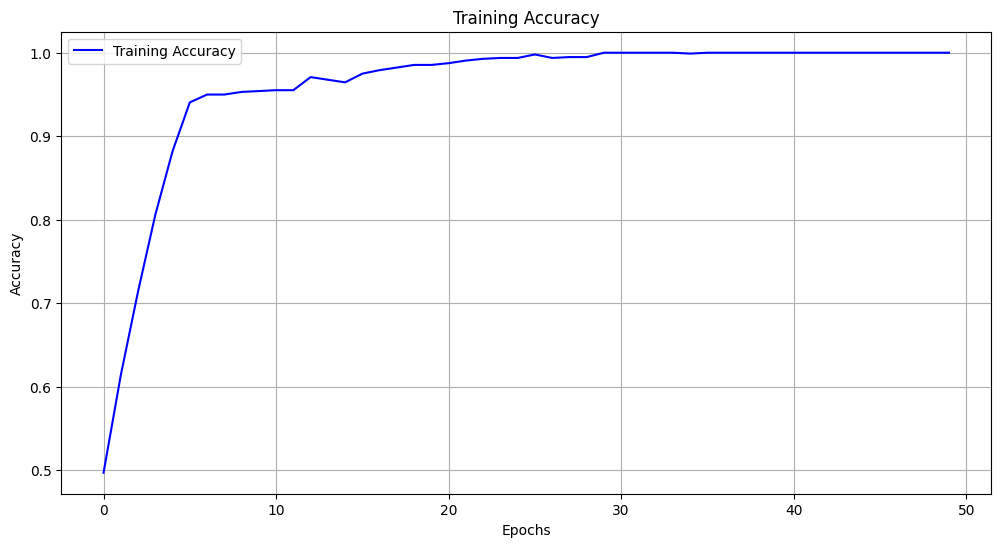

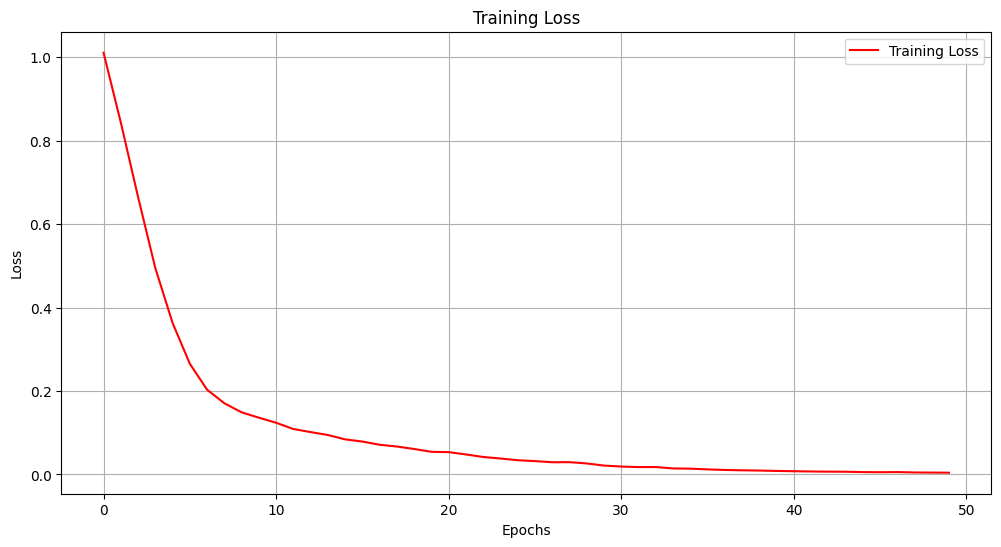

In [ ]:
# Plot Akurasi
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions = model.predict(X_test_mental)

# Untuk klasifikasi multi-kelas, ambil argmax untuk kelas dengan probabilitas tertinggi
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan hasil prediksi
print("Predictions (kelas yang diprediksi):", predicted_classes)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predictions (kelas yang diprediksi): [2 2 2 2 1 1 1 2 1 2 1 1 2 2 1 2 1 1 1 1 2 1 2 1 1 2 1 0 1 1 1 1 2 2 2 0 1
 2 1 0 1 2 1 2 1 2 2 2 2 1 2 2 1 1 1 1 1 0 1 0 1 1 0 1 2 2 1 2 0 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 0 1 2 1 1 1 2 1 2 1 2 2 2 1 2 2
 1 1 1 2 2 2 1 2 2 1 0 0 2 2 1 1 1 2 1 1 1 1 1 0 1 1 2 1 1 0 1 2 1 1 1 2 1
 2 2 0 1 1 1 2 1 2 1 1 1 2 2 2 1 1 1 2 1 2 0 2 0 1 2 0 2 1 2 1 1 1 1 0 2 1
 0 2 1 0 1 2 2 1 1 2 2 1 1 1 1 2 1 1 2 0 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 1
 1 1 2 2 2 1 1 1 0 0 2 1 1 2 0 2 1 1 2 1 2 1 1 2 1 1 1 0 2 1 1 1 2 1 2 2 1
 2 1 1 2 1 2 2 2 1 2 1 2 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 2 2 2 0 1 2 1 2 2 1
 0 0 2 2]


In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test_mental, predicted_classes)
# print(f"Accuracy on test data: {accuracy * 100:.2f}%")

In [ ]:
model = tf.keras.models.load_model('/content/model_mental_health_status_norm.h5')
# Mengonversi model ke format TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Jika model Keras (.h5)
# converter = tf.lite.TFLiteConverter.from_saved_model('mental_health_model')  # Jika menggunakan SavedModel

# (Opsional) Terapkan optimasi untuk memperkecil ukuran model
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# (Opsional) Tentukan jenis target perangkat (misalnya untuk quantization)
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8
# converter.inference_output_type = tf.int8

# Mengonversi dan menyimpan model TFLite
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file
with open('mental_health_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpcccwbrt5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11), dtype=tf.float32, name='input_layer_21')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139562023721040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139562022404864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139562022415424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139562022417536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139562022419648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139562022689024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139562022690608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139562022691488: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
interpreter = tf.lite.Interpreter(model_path='/content/mental_health_model.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Menyediakan input untuk model
input_data = np.array(X_test_mental[0:1], dtype=np.float32)  # Uji 1 sampel, sesuaikan X_test

# Menyediakan input ke interpreter
interpreter.set_tensor(input_details[0]['index'], input_data)

# Menjalankan inferensi
interpreter.invoke()

# Mengambil hasil output
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Prediksi:", output_data)


Prediksi: [[1.3155026e-05 2.4817410e-04 9.9973875e-01]]
